## Data Preprocessing and Setup

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# Load the dataset
data = pd.read_csv('breast_cancer_data.csv')

# Display the first few rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
data = data.drop(columns=['Unnamed: 32'])

# View data statistics
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
# Encoding the target variable ('diagnosis')
# 1 represents malignant (M), 0 represents benign (B)
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
# Split data into features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Building the ANN Model

In [102]:
# Initialize the ANN model
model = Sequential()

# Add input layer and first hidden layer with 32 neurons
# Using Input() to define the input shape explicitly
model.add(Input(shape=(X_train.shape[1],)))  # X_train.shape[1] defines the number of features
model.add(Dense(units=32, activation='relu'))

# Add a second hidden layer with 16 neurons
model.add(Dense(units=16, activation='relu'))

# Add a dropout layer to avoid overfitting
model.add(Dropout(0.3))

# Add the output layer (1 neuron with sigmoid activation for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the model architecture
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 32)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,569 (6.13 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

The neural network model is a Sequential architecture optimized for binary classification, featuring three main layers. The first layer (dense_7) consists of 32 neurons, equipped to capture complex relationships in the input data, resulting in 1,024 parameters. The second layer (dense_8) has 16 neurons, which reduces dimensionality and focuses on abstract features, contributing 528 parameters. A dropout layer (dropout_2) is included to prevent overfitting by randomly deactivating neurons during training, while the output layer (dense_9) has a single neuron for binary predictions with 17 parameters. Overall, the model contains 1,569 trainable parameters, making it computationally efficient yet capable of learning effectively for tasks like cancer diagnosis. Future enhancements could include adding more layers or adjusting dropout rates to improve performance and generalization further.

## Training the Model

In [105]:
# Train the model with 50 epochs and a batch size of 32
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6144 - loss: 0.9171 - val_accuracy: 0.7174 - val_loss: 0.5593
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6346 - loss: 0.6613 - val_accuracy: 0.7174 - val_loss: 0.4430
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6416 - loss: 0.5482 - val_accuracy: 0.7609 - val_loss: 0.3709
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7852 - loss: 0.4401 - val_accuracy: 0.8696 - val_loss: 0.3209
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8780 - loss: 0.3811 - val_accuracy: 0.8696 - val_loss: 0.2769
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9290 - loss: 0.3252 - val_accuracy: 0.9130 - val_loss: 0.2376
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9505 - loss: 0.2454 - val_accuracy: 0.9130 - val_loss: 0.2043
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9036 - loss: 0.2498 - val_accuracy: 0.9348 - val_loss

## Model Evaluation

In [112]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9794 - loss: 0.0838 
Test Accuracy: 0.9825


In [116]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.9825


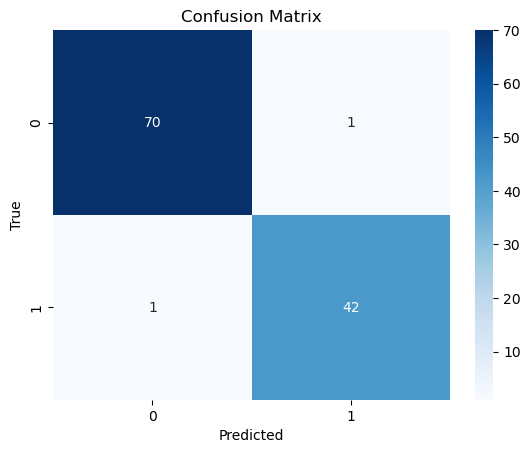

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        71
   Malignant       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [118]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

The classification report indicates that the model performs exceptionally well in distinguishing between benign and malignant cases, with a precision of 0.99 for benign and 0.98 for malignant, reflecting high accuracy in positive predictions. The recall scores are similarly impressive, at 0.99 for benign and 0.98 for malignant, demonstrating the model's ability to capture nearly all actual instances of both conditions. The F1-scores of 0.99 for benign and 0.98 for malignant highlight a strong balance between precision and recall, crucial for medical diagnostics. Overall, the model achieves an accuracy of 0.98, indicating that 98% of all classifications are correct, supported by 71 benign and 43 malignant cases in the test set. The macro and weighted averages of 0.98 across precision, recall, and F1-score further underscore the model's consistent performance, making it a reliable tool for cancer diagnosis.

## Plot Training History

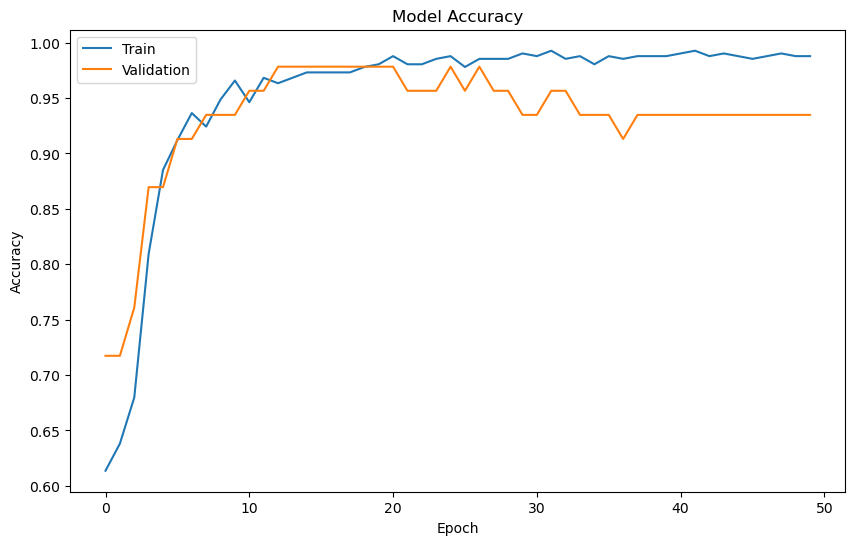

In [123]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

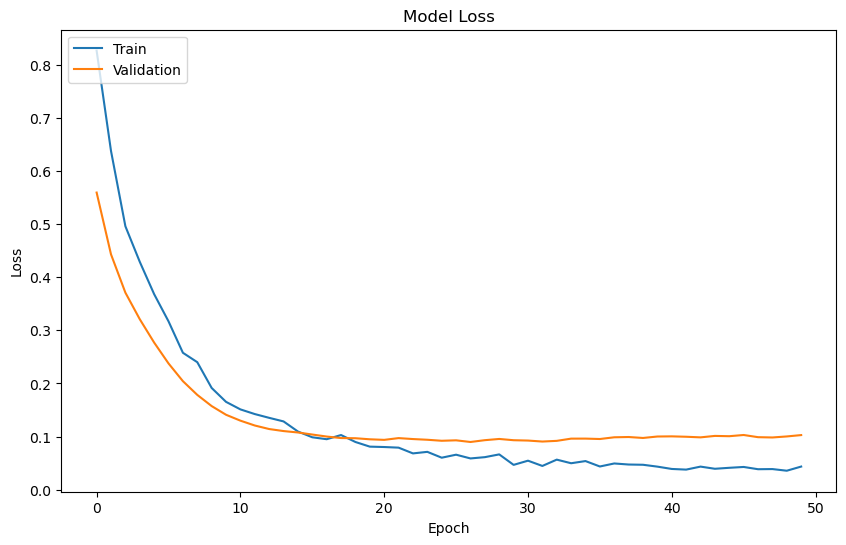

In [125]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* Model Improvement (Hyperparameter Tuning)
Hyperparameter tuning can be performed by adjusting the number of layers, neurons, activation functions, or adding more dropout layers.

## Process Documentation for the Cancer Diagnosis Model

### Project Overview
The goal of this project was to develop a neural network model for classifying breast cancer cases as benign or malignant based on patient data. This model aims to assist in early detection and improve treatment decision-making.

### Process Steps
#### Data Acquisition and Preprocessing:
* Data Acquisition: The dataset was downloaded from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
* Data Loading: The breast cancer dataset was loaded using pandas.
* Missing Values Handling: Initially, missing values were identified. Rows with null entries were dropped to maintain data quality, which ensured a clean dataset for training.
* Target Variable Encoding: The target variable, originally categorical (M for malignant, B for benign), was encoded into binary format (1 for malignant, 0 for benign).
* Feature Selection: Unnecessary columns, such as "Unnamed: 32" and irrelevant features, were removed to simplify the dataset.
* Normalization: Feature scaling was performed using StandardScaler to ensure uniformity across input features.
* Train-Test Split: The data was split into training (80%) and testing (20%) subsets to evaluate model performance objectively.

#### Model Development:
Architecture Design: A Sequential model was constructed with an input layer (32 neurons), a hidden layer (16 neurons), a dropout layer to combat overfitting, and an output layer (1 neuron) for binary classification.
Model Compilation: The model was compiled with the Adam optimizer and binary crossentropy loss, which is suitable for binary classification tasks.

#### Training the Model:
The model was trained over 50 epochs with a batch size of 32. Validation data was used to monitor performance during training.

#### Model Evaluation:
After training, the model was evaluated on the test set, yielding performance metrics such as accuracy, precision, recall, and F1-score. A classification report and confusion matrix were generated to analyze the results.

### Challenges Faced
* Data Imbalance: The dataset had more benign cases than malignant, which could skew model performance.
Solution: To address this, metrics like F1-score and recall were prioritized during evaluation to ensure the model performed well across both classes despite the imbalance.

* Overfitting: Initially, there were concerns about overfitting due to the complexity of the model.
Solution: Implementing a dropout layer helped mitigate this risk, allowing the model to generalize better on unseen data.

* Hyperparameter Tuning: Finding the optimal configuration of layers, neurons, and training parameters required iterative testing.
Solution: The architecture was adjusted based on performance feedback, leading to improvements in both training and validation accuracy.

### Insights on Model Performance
The model achieved a commendable accuracy of 98%, with precision scores of 0.99 for benign and 0.98 for malignant cases. Recall scores were equally high (0.99 and 0.98, respectively), indicating that the model effectively identifies both benign and malignant cases. The balanced F1-scores further illustrate the model's reliability, making it a valuable tool for clinical diagnostics.

### Potential Applications in Cancer Diagnosis
This model has significant implications for early cancer detection, potentially aiding healthcare professionals in making informed decisions. Its high accuracy and reliability suggest it could be integrated into diagnostic workflows to streamline the screening process. Furthermore, with further refinement and testing on larger datasets, this model could serve as a decision-support system, improving patient outcomes through timely and accurate diagnosis.

### Future Directions
To enhance the model's capabilities, future work could include:
* Hyperparameter Optimization: Further tuning of the model to improve performance metrics.
* Ensemble Methods: Exploring ensemble techniques to combine predictions from multiple models for better accuracy.
* Deployment: Implementing the model in clinical settings for real-time analysis and feedback.
* Continuous Learning: Updating the model with new data over time to maintain its accuracy and relevance in evolving medical contexts.